# Movie Rating Prediction - Optimal Parameter

Pada bagian sebelumnya, dari beberapa model regresi yang telah dievaluasi kita mendapatkan Random Forest Regressor sebagai model yang menghasilkan RMSE paling rendah.
Namun, kita juga perlu ingat bahwa model yang kita evaluasi masih menggunakan nilai - nilai default.
Artinya masih ada kemungkinan performa model tersebut untuk meningkat jika kita bisa mengetahui setting parameter yang optimal.

Tantangannya adalah, tidak semua dari parameter tersebut memiliki panduan bagaimana menemukan nilai optimal.
Beberapa diantaranya sangat tergantung kasus yang dikerjakan dan pencariannya bersifat trial-and-error.
Kali ini kita akan mencoba mencari nilai parameter optimal dari Random Forest Regressor, dengan tujuan untuk mendapatkan nilai cross validation score RMSE yang lebih kecil lagi.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
# load the data
features = np.loadtxt('files/rating-processed.csv')
target = np.loadtxt('files/rating-processed-target.csv')


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(features, target)

In [7]:
# grid search
from sklearn.ensemble import RandomForestRegressor

# default parameter random forest regressor
rf_reg = RandomForestRegressor()
print(rf_reg)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [8]:
param_grid = {'n_estimators': [10, 50, 100, 1000],
   'max_depth': [None, 2, 3, 4]
  }
 

gridsearch = GridSearchCV(rf_reg, param_grid, cv=10)
gridsearch.fit(x_train, t_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 1000], 'max_depth': [None, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
# print best parameter
gridsearch.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [10]:
# hasil prediksi ke data test
y_test = gridsearch.best_estimator_.predict(x_test)


In [15]:
# save dan load model ke binary file
import pickle

pickle.dump(gridsearch.best_estimator_, open('best_rf.pkl', 'wb'))
rf = pickle.load(open('best_rf.pkl', 'rb'))

## Plot the Prediction vs Target

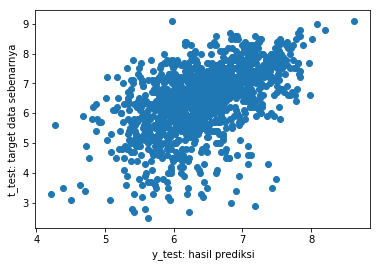

In [16]:
# validasi data training
plt.scatter(y_test, t_test)
plt.xlabel("y_test: hasil prediksi")
plt.ylabel("t_test: target data sebenarnya")
plt.show()